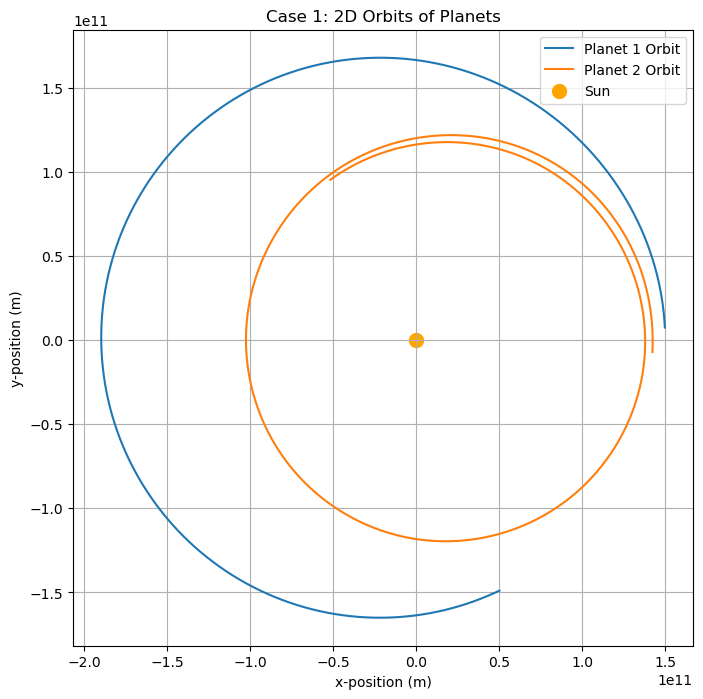

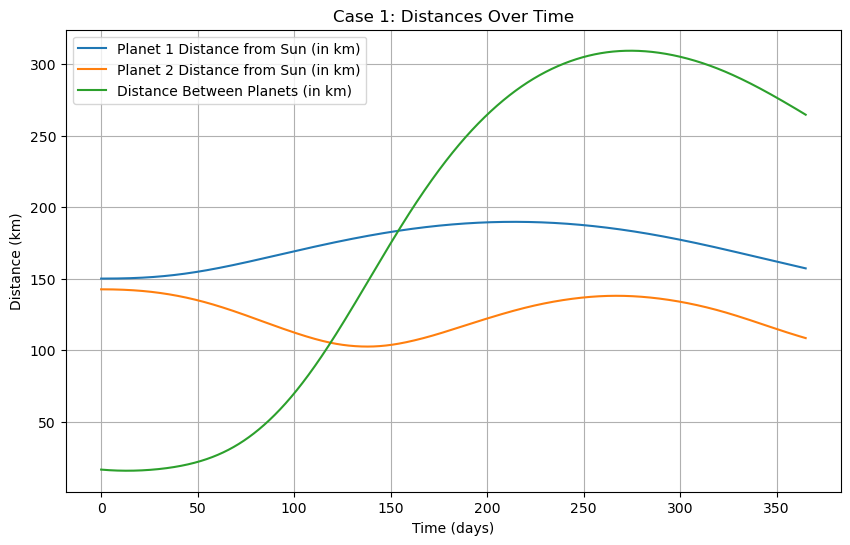

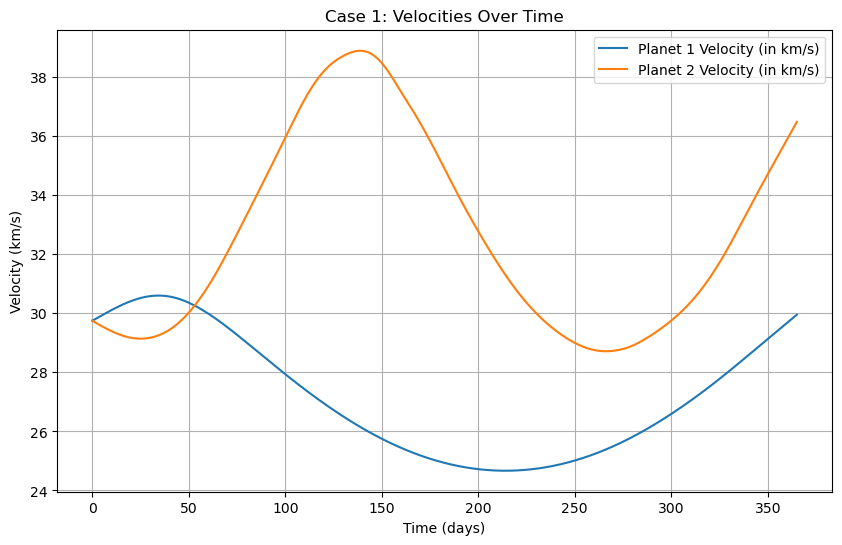

Animation saved as 'planetanimation.gif'


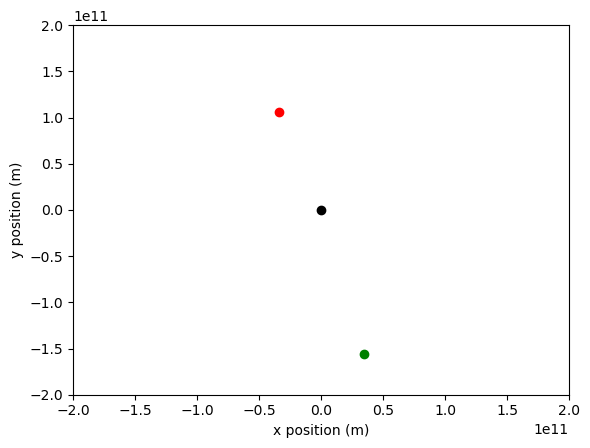

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
Ms = 1.989e30    # Solar mass (kg)
Rp1 = 150e9      # Orbital radius of planet 1 (m)
Mp1 = 0.001 * Ms # Mass of planet 1 (kg)

# Helper function for circular orbital velocity
def circular_velocity(M, R):
    return np.sqrt(G * M / R)

# Case 1: Initialization
Rp2_case1 = 0.95 * Rp1
theta1_case1 = 0.05  # radians
theta2_case1 = -0.05 # radians

x1_case1 = Rp1 * np.cos(theta1_case1)
y1_case1 = Rp1 * np.sin(theta1_case1)
x2_case1 = Rp2_case1 * np.cos(theta2_case1)
y2_case1 = Rp2_case1 * np.sin(theta2_case1)

v1_case1 = circular_velocity(Ms, Rp1)
v2_case1 = v1_case1

vx1_case1 = -v1_case1 * np.sin(theta1_case1)
vy1_case1 = v1_case1 * np.cos(theta1_case1)
vx2_case1 = -v2_case1 * np.sin(theta2_case1)
vy2_case1 = v2_case1 * np.cos(theta2_case1)

# Packing initial conditions
u0_case1 = [x1_case1, y1_case1, x2_case1, y2_case1, vx1_case1, vy1_case1, vx2_case1, vy2_case1]

# Differential equations for the system
def equations(t, u):
    x1, y1, x2, y2, vx1, vy1, vx2, vy2 = u
    R1 = np.sqrt(x1**2 + y1**2)
    R2 = np.sqrt(x2**2 + y2**2)
    dx = x1 - x2
    dy = y1 - y2
    R12 = np.sqrt(dx**2 + dy**2)

    # Accelerations
    ax1 = -G * Ms / R1**3 * x1 + G * Mp1 / R12**3 * dx
    ay1 = -G * Ms / R1**3 * y1 + G * Mp1 / R12**3 * dy
    ax2 = -G * Ms / R2**3 * x2 - G * Mp1 / R12**3 * dx
    ay2 = -G * Ms / R2**3 * y2 - G * Mp1 / R12**3 * dy

    return [vx1, vy1, vx2, vy2, ax1, ay1, ax2, ay2]

# Solving the system with solve_ivp
time_span = [0, 3.154e7]  # One year in seconds
time_step = 3600          # One hour
time_eval = np.arange(0, time_span[1], time_step)

solution = solve_ivp(equations, time_span, u0_case1, t_eval=time_eval, method='RK45')

times_case1 = solution.t
orbits_case1 = solution.y.T  # Transpose for consistency

# Plotting 2D orbits
def plot_orbits_2D(orbits, title):
    plt.figure(figsize=(8, 8))
    plt.plot(orbits[:, 0], orbits[:, 1], label="Planet 1 Orbit")
    plt.plot(orbits[:, 2], orbits[:, 3], label="Planet 2 Orbit")
    plt.scatter(0, 0, color="orange", label="Sun", s=100)
    plt.xlabel("x-position (m)")
    plt.ylabel("y-position (m)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

plot_orbits_2D(orbits_case1, "Case 1: 2D Orbits of Planets")

# Compute distances and velocities
def compute_distances_and_velocities(orbits):
    x1, y1, x2, y2 = orbits[:, 0], orbits[:, 1], orbits[:, 2], orbits[:, 3]
    vx1, vy1, vx2, vy2 = orbits[:, 4], orbits[:, 5], orbits[:, 6], orbits[:, 7]
    
    # Distances
    R1 = np.sqrt(x1**2 + y1**2)  # Distance of Planet 1 from the sun
    R2 = np.sqrt(x2**2 + y2**2)  # Distance of Planet 2 from the sun
    R12 = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)  # Distance between planets

    # Velocities
    V1 = np.sqrt(vx1**2 + vy1**2)  # Speed of Planet 1
    V2 = np.sqrt(vx2**2 + vy2**2)  # Speed of Planet 2
    
    return R1, R2, R12, V1, V2

R1_case1, R2_case1, R12_case1, V1_case1, V2_case1 = compute_distances_and_velocities(orbits_case1)

# Plot distances over time
def plot_distances(times, R1, R2, R12, title):
    plt.figure(figsize=(10, 6))
    plt.plot(times / 86400, R1 / 1e9, label="Planet 1 Distance from Sun (in km)")
    plt.plot(times / 86400, R2 / 1e9, label="Planet 2 Distance from Sun (in km)")
    plt.plot(times / 86400, R12 / 1e9, label="Distance Between Planets (in km)")
    plt.xlabel("Time (days)")
    plt.ylabel("Distance (km)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

plot_distances(times_case1, R1_case1, R2_case1, R12_case1, "Case 1: Distances Over Time")

# Plot velocities over time
def plot_velocities(times, V1, V2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(times / 86400, V1 / 1e3, label="Planet 1 Velocity (in km/s)")
    plt.plot(times / 86400, V2 / 1e3, label="Planet 2 Velocity (in km/s)")
    plt.xlabel("Time (days)")
    plt.ylabel("Velocity (km/s)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

plot_velocities(times_case1, V1_case1, V2_case1, "Case 1: Velocities Over Time")

# Animated 2D Plot
fig = plt.figure()
ax = fig.subplots()
plt.axis([-2e11, 2e11, -2e11, 2e11])
plt.plot(0, 0, 'ko', lw=2)
ax.set_xlabel('x position (m)')
ax.set_ylabel('y position (m)')

line1, = ax.plot([], [], 'go', lw=2)
line2, = ax.plot([], [], 'ro', lw=2)

Nskip = 100  # Skip steps for animation
Nframes = len(times_case1) // Nskip

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

def animate(i):
    xp1 = orbits_case1[i * Nskip, 0]
    yp1 = orbits_case1[i * Nskip, 1]
    xp2 = orbits_case1[i * Nskip, 2]
    yp2 = orbits_case1[i * Nskip, 3]
    line1.set_data([xp1], [yp1])
    line2.set_data([xp2], [yp2])
    return line1, line2

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nframes, 
                               interval=100, blit=True)

# Save the animation as a GIF
f = "planetanimation.gif"
writergif = animation.PillowWriter(fps=30)
anim.save(f, writer=writergif)

print("Animation saved as 'planetanimation.gif'")

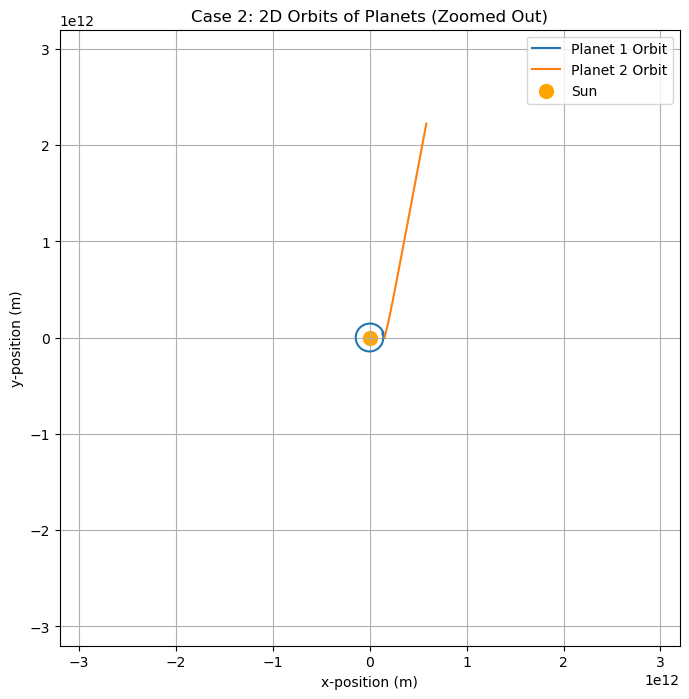

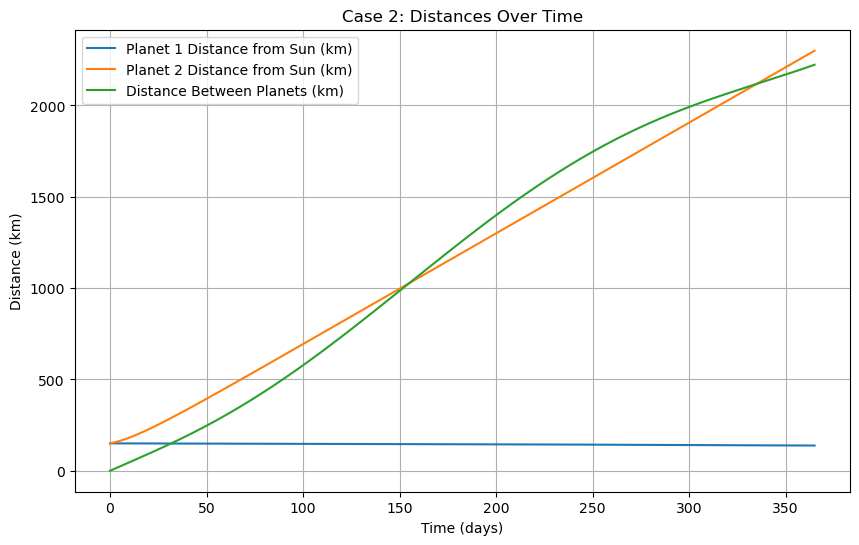

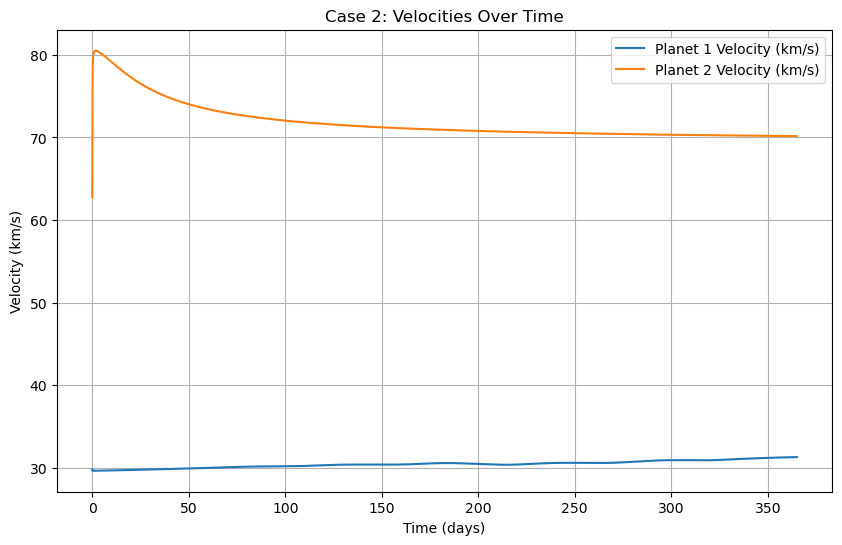

Animation for Case 2 saved as 'planetanimation_case2.gif'


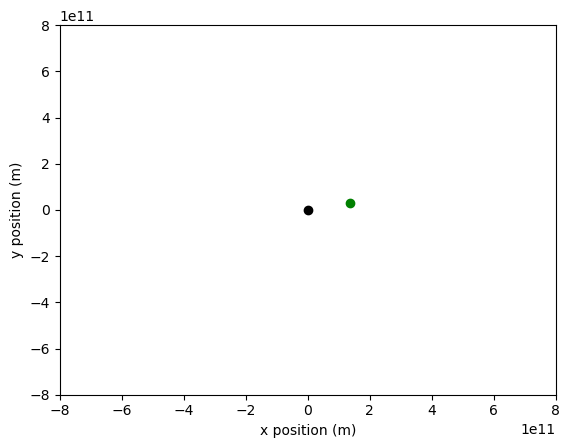

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
Ms = 1.989e30    # Solar mass (kg)
Rp1_case2 = 150e9  # Orbital radius of planet 1 (m)
Mp1_case2 = 0.001 * Ms  # Mass of planet 1 (kg)
Mp2_case2 = 0.01 * Mp1_case2  # Mass of planet 2 (1% of planet 1)

# Helper function for circular orbital velocity
def circular_velocity_case2(M, R):
    return np.sqrt(G * M / R)

# Case 2: Initialization
Rp2_case2 = 1.001 * Rp1_case2  # Orbital radius of planet 2
theta1_case2 = 0.0  # Planet 1 angle (horizontal)
theta2_case2 = 0.0  # Planet 2 angle (horizontal)

# Initial positions
x1_case2 = Rp1_case2 * np.cos(theta1_case2)
y1_case2 = Rp1_case2 * np.sin(theta1_case2)
x2_case2 = Rp2_case2 * np.cos(theta2_case2)
y2_case2 = Rp2_case2 * np.sin(theta2_case2)

# Orbital velocities (magnitude)
v1_case2 = circular_velocity_case2(Ms, Rp1_case2)
v2_case2 = 2.11 * v1_case2  # Given condition for Planet 2

# Initial velocity components
vx1_case2 = -v1_case2 * np.sin(theta1_case2)
vy1_case2 = v1_case2 * np.cos(theta1_case2)

vx2_case2 = -v2_case2 * np.sin(theta2_case2)
vy2_case2 = v2_case2 * np.cos(theta2_case2)

# Packing initial conditions
u0_case2 = [x1_case2, y1_case2, x2_case2, y2_case2, vx1_case2, vy1_case2, vx2_case2, vy2_case2]

# Differential equations for the system
def equations_case2(t, u):
    x1, y1, x2, y2, vx1, vy1, vx2, vy2 = u
    R1 = np.sqrt(x1**2 + y1**2)
    R2 = np.sqrt(x2**2 + y2**2)
    dx = x1 - x2
    dy = y1 - y2
    R12 = np.sqrt(dx**2 + dy**2)

    # Accelerations
    ax1 = -G * Ms / R1**3 * x1 + G * Mp2_case2 / R12**3 * dx
    ay1 = -G * Ms / R1**3 * y1 + G * Mp2_case2 / R12**3 * dy
    ax2 = -G * Ms / R2**3 * x2 - G * Mp1_case2 / R12**3 * dx
    ay2 = -G * Ms / R2**3 * y2 - G * Mp1_case2 / R12**3 * dy

    return [vx1, vy1, vx2, vy2, ax1, ay1, ax2, ay2]

# Solving the system with solve_ivp
time_span_case2 = [0, 3.154e7]  # One year in seconds
time_step_case2 = 3600          # One hour
time_eval_case2 = np.arange(0, time_span_case2[1], time_step_case2)

solution_case2 = solve_ivp(equations_case2, time_span_case2, u0_case2, t_eval=time_eval_case2, method='RK45')

times_case2 = solution_case2.t
orbits_case2 = solution_case2.y.T  # Transpose for consistency

# Plotting 2D orbits for Case 2
def plot_orbits_2D_case2(orbits, title):
    plt.figure(figsize=(8, 8))
    plt.plot(orbits[:, 0], orbits[:, 1], label="Planet 1 Orbit")
    plt.plot(orbits[:, 2], orbits[:, 3], label="Planet 2 Orbit")
    plt.scatter(0, 0, color="orange", label="Sun", s=100)
    plt.xlabel("x-position (m)")
    plt.ylabel("y-position (m)")
    plt.title(title)
    plt.legend()
    plt.axis([-32e11, 32e11, -32e11, 32e11])  # Doubled range for zoomed-out view
    plt.grid()
    plt.show()

# Call the updated function
plot_orbits_2D_case2(orbits_case2, "Case 2: 2D Orbits of Planets (Zoomed Out)")

# Compute distances and velocities for Case 2
def compute_distances_and_velocities_case2(orbits):
    x1, y1, x2, y2 = orbits[:, 0], orbits[:, 1], orbits[:, 2], orbits[:, 3]
    vx1, vy1, vx2, vy2 = orbits[:, 4], orbits[:, 5], orbits[:, 6], orbits[:, 7]
    
    # Distances
    R1 = np.sqrt(x1**2 + y1**2)  # Distance of Planet 1 from the sun
    R2 = np.sqrt(x2**2 + y2**2)  # Distance of Planet 2 from the sun
    R12 = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)  # Distance between planets

    # Velocities
    V1 = np.sqrt(vx1**2 + vy1**2)  # Speed of Planet 1
    V2 = np.sqrt(vx2**2 + vy2**2)  # Speed of Planet 2
    
    return R1, R2, R12, V1, V2

R1_case2, R2_case2, R12_case2, V1_case2, V2_case2 = compute_distances_and_velocities_case2(orbits_case2)

# Plot distances over time
def plot_distances_case2(times, R1, R2, R12, title):
    plt.figure(figsize=(10, 6))
    plt.plot(times / 86400, R1 / 1e9, label="Planet 1 Distance from Sun (km)")
    plt.plot(times / 86400, R2 / 1e9, label="Planet 2 Distance from Sun (km)")
    plt.plot(times / 86400, R12 / 1e9, label="Distance Between Planets (km)")
    plt.xlabel("Time (days)")
    plt.ylabel("Distance (km)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

plot_distances_case2(times_case2, R1_case2, R2_case2, R12_case2, "Case 2: Distances Over Time")

# Plot velocities over time
def plot_velocities_case2(times, V1, V2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(times / 86400, V1 / 1e3, label="Planet 1 Velocity (km/s)")
    plt.plot(times / 86400, V2 / 1e3, label="Planet 2 Velocity (km/s)")
    plt.xlabel("Time (days)")
    plt.ylabel("Velocity (km/s)")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

plot_velocities_case2(times_case2, V1_case2, V2_case2, "Case 2: Velocities Over Time")
# Animated 2D Plot
fig = plt.figure()
ax = fig.subplots()
plt.axis([-8e11, 8e11, -8e11, 8e11])  # Expanded range
plt.plot(0, 0, 'ko', lw=2)
ax.set_xlabel('x position (m)')
ax.set_ylabel('y position (m)')

line1_case2, = ax.plot([], [], 'go', lw=2)
line2_case2, = ax.plot([], [], 'ro', lw=2)

Nskip_case2 = 100  # Skip steps for animation
Nframes_case2 = len(times_case2) // Nskip_case2

def init_case2():
    line1_case2.set_data([], [])
    line2_case2.set_data([], [])
    return line1_case2, line2_case2

def animate_case2(i):
    xp1 = orbits_case2[i * Nskip_case2, 0]
    yp1 = orbits_case2[i * Nskip_case2, 1]
    xp2 = orbits_case2[i * Nskip_case2, 2]
    yp2 = orbits_case2[i * Nskip_case2, 3]
    line1_case2.set_data([xp1], [yp1])
    line2_case2.set_data([xp2], [yp2])
    return line1_case2, line2_case2

# Create the animation
anim_case2 = animation.FuncAnimation(fig, animate_case2, init_func=init_case2, frames=Nframes_case2, 
                                     interval=100, blit=True)

# Save the animation as a GIF
f_case2 = "planetanimation_case2.gif"
writergif_case2 = animation.PillowWriter(fps=30)
anim_case2.save(f_case2, writer=writergif_case2)

print("Animation for Case 2 saved as 'planetanimation_case2.gif'")


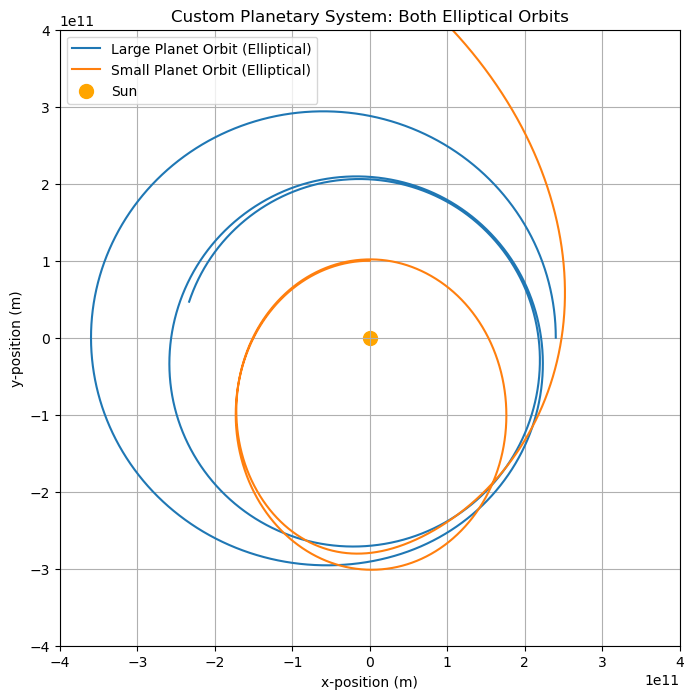

Animation for Custom Planetary System saved as 'custom_planetary_system_both_elliptical.gif'


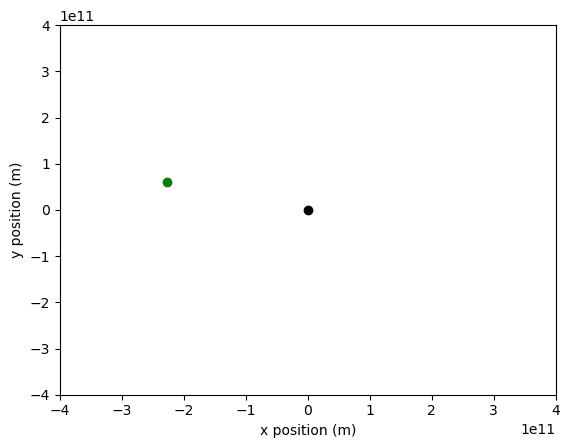

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
Ms = 1.989e30    # Solar mass (kg)

# Orbital Parameters
a_large = 300e9   # Semi-major axis of the large planet (m)
e_large = 0.2     # Eccentricity of the large planet
a_small = 200e9   # Semi-major axis of the small planet (m)
e_small = 0.5     # Eccentricity of the small planet
M_large = 0.005 * Ms  # Large planet mass (kg)
M_small = 0.001 * Ms  # Small planet mass (kg)

# Derived Parameters
R_periapsis_large = a_large * (1 - e_large)
R_periapsis_small = a_small * (1 - e_small)

# Initial angles (radians)
theta_large = 0           # Large planet starts at periapsis
theta_small = np.pi / 2   # Small planet starts at periapsis (top)

# Orbital velocities at periapsis
v_large_periapsis = np.sqrt(G * Ms * (2 / R_periapsis_large - 1 / a_large))
v_small_periapsis = np.sqrt(G * Ms * (2 / R_periapsis_small - 1 / a_small))

# Initial positions
x_large = R_periapsis_large * np.cos(theta_large)
y_large = R_periapsis_large * np.sin(theta_large)
x_small = R_periapsis_small * np.cos(theta_small)
y_small = R_periapsis_small * np.sin(theta_small)

# Initial velocity components
vx_large = -v_large_periapsis * np.sin(theta_large)
vy_large = v_large_periapsis * np.cos(theta_large)

vx_small = -v_small_periapsis * np.sin(theta_small)
vy_small = v_small_periapsis * np.cos(theta_small)

# Initial conditions
u0_system = [x_large, y_large, x_small, y_small, vx_large, vy_large, vx_small, vy_small]

# Differential equations for the system
def equations_system(t, u):
    x_large, y_large, x_small, y_small, vx_large, vy_large, vx_small, vy_small = u
    R_large = np.sqrt(x_large**2 + y_large**2)
    R_small = np.sqrt(x_small**2 + y_small**2)
    dx = x_large - x_small
    dy = y_large - y_small
    R_ls = np.sqrt(dx**2 + dy**2)

    # Accelerations
    ax_large = -G * Ms / R_large**3 * x_large + G * M_small / R_ls**3 * dx
    ay_large = -G * Ms / R_large**3 * y_large + G * M_small / R_ls**3 * dy
    ax_small = -G * Ms / R_small**3 * x_small - G * M_large / R_ls**3 * dx
    ay_small = -G * Ms / R_small**3 * y_small - G * M_large / R_ls**3 * dy

    return [vx_large, vy_large, vx_small, vy_small, ax_large, ay_large, ax_small, ay_small]

# Orbital periods to ensure full loops
T_large = 2 * np.pi * np.sqrt(a_large**3 / (G * Ms))  # Orbital period of the large planet
T_small = 2 * np.pi * np.sqrt(a_small**3 / (G * Ms))  # Orbital period of the small planet

# Simulation parameters
time_span_system = [0, 2 * max(T_large, T_small)]  # 2 full orbits for both planets
time_step_system = 3600                            # 1 hour
time_eval_system = np.arange(0, time_span_system[1], time_step_system)

# Solve the system using solve_ivp
solution_system = solve_ivp(
    equations_system,
    time_span_system,
    u0_system,
    t_eval=time_eval_system,
    method='RK45'
)

times_system = solution_system.t
orbits_system = solution_system.y.T  # Transpose for consistency

# Plotting 2D orbits
def plot_orbits_2D_system(orbits, title):
    plt.figure(figsize=(8, 8))
    plt.plot(orbits[:, 0], orbits[:, 1], label="Large Planet Orbit (Elliptical)")
    plt.plot(orbits[:, 2], orbits[:, 3], label="Small Planet Orbit (Elliptical)")
    plt.scatter(0, 0, color="orange", label="Sun", s=100)
    plt.xlabel("x-position (m)")
    plt.ylabel("y-position (m)")
    plt.title(title)
    plt.legend()
    plt.axis([-4e11, 4e11, -4e11, 4e11])  # Expanded range for visualization
    plt.grid()
    plt.show()

plot_orbits_2D_system(orbits_system, "Custom Planetary System: Both Elliptical Orbits")

# Animated 2D Plot
fig = plt.figure()
ax = fig.subplots()
plt.axis([-4e11, 4e11, -4e11, 4e11])  # Expanded range
plt.plot(0, 0, 'ko', lw=2)
ax.set_xlabel('x position (m)')
ax.set_ylabel('y position (m)')

line_large, = ax.plot([], [], 'go', lw=2)
line_small, = ax.plot([], [], 'ro', lw=2)

Nskip_system = 100  # Skip steps for animation
Nframes_system = len(times_system) // Nskip_system

def init_system():
    line_large.set_data([], [])
    line_small.set_data([], [])
    return line_large, line_small

def animate_system(i):
    x_large = orbits_system[i * Nskip_system, 0]
    y_large = orbits_system[i * Nskip_system, 1]
    x_small = orbits_system[i * Nskip_system, 2]
    y_small = orbits_system[i * Nskip_system, 3]
    line_large.set_data([x_large], [y_large])
    line_small.set_data([x_small], [y_small])
    return line_large, line_small

# Create the animation
anim_system = animation.FuncAnimation(fig, animate_system, init_func=init_system, frames=Nframes_system, 
                                      interval=100, blit=True)

# Save the animation as a GIF
f_system = "custom_planetary_system_both_elliptical.gif"
writergif_system = animation.PillowWriter(fps=30)
anim_system.save(f_system, writer=writergif_system)

print("Animation for Custom Planetary System saved as 'custom_planetary_system_both_elliptical.gif'")